# Demagnetizing factors presented by Stoner (1945)

This notebook aims at reproducing the demagnetizing factors values presented by Stoner (1945).

* Stoner, E. C.: The demagnetizing factors for ellipsoids, The London, Edinburgh, and Dublin Philosophical Magazine and Journal of Science, 36, 803–821, 1945.

## Import the required modules

In [1]:
from __future__ import division
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from fatiando import utils
import mesher
import prolate_ellipsoid, oblate_ellipsoid

In [2]:
# Set some plot parameters
from matplotlib import rcParams
rcParams['figure.dpi'] = 300.
rcParams['font.size'] = 6
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'
rcParams['axes.labelsize'] = 'large'
rcParams['legend.fontsize'] = 'medium'
rcParams['savefig.dpi'] = 300.

## Stoner (1945, Fig. 4)

#### Squared eccentricity $\epsilon^{2}$

In [3]:
e2 = np.linspace(0.001, 0.99, 100)

In [4]:
# m = a/b
m = np.sqrt(1 - e2)

print m

[ 0.99949987  0.99448987  0.9894545   0.98439337  0.97930608  0.97419223
  0.96905139  0.96388314  0.95868702  0.95346259  0.94820937  0.94292689
  0.93761464  0.93227212  0.92689882  0.92149418  0.91605765  0.91058867
  0.90508664  0.89955095  0.893981    0.88837611  0.88273565  0.87705891
  0.87134518  0.86559374  0.85980383  0.85397466  0.84810543  0.8421953
  0.8362434   0.83024884  0.82421067  0.81812794  0.81199965  0.80582475
  0.79960217  0.79333079  0.78700943  0.78063688  0.77421188  0.76773312
  0.76119921  0.75460874  0.74796019  0.74125201  0.73448257  0.72765015
  0.72075297  0.71378915  0.70675671  0.69965359  0.69247762  0.6852265
  0.67789782  0.67048904  0.66299748  0.65542029  0.64775447  0.63999684
  0.63214402  0.62419241  0.61613818  0.60797727  0.59970531  0.59131765
  0.58280929  0.57417486  0.56540859  0.55650424  0.54745509  0.53825382
  0.5288925   0.51936247  0.50965427  0.49975752  0.48966078  0.47935141
  0.4688154   0.45803709  0.44699897  0.43568128  0.4

#### Prolate ellipsoids

In [5]:
# semi-axes (in m)
a0 = 100
b = a0*m

# demagnetizing factors
n11_prolate = []
n22_prolate = []

for bi in b:
    ellipsoid = mesher.ProlateEllipsoid(0, 0, 0, a0, bi, 0, 0, 180)
    N1, N2 = prolate_ellipsoid.demag_factors(ellipsoid)
    n11_prolate.append(N1)
    n22_prolate.append(N2)

#### Oblate ellipsoids

In [6]:
# semi-axes (in m)
b0 = 100
a = b0*m

# demagnetizing factors
n11_oblate = []
n22_oblate = []

for ai in a:
    ellipsoid = mesher.OblateEllipsoid(0, 0, 0, ai, b0, 0, 0, 180)
    N1, N2 = oblate_ellipsoid.demag_factors(ellipsoid)
    n11_oblate.append(N1)
    n22_oblate.append(N2)

#### Plot the results

In [7]:
x = np.linspace(-1, 1, 11)
xlables = x.copy()
xlables[xlables < 0] *= -1

print x
print xlables

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[ 1.   0.8  0.6  0.4  0.2  0.   0.2  0.4  0.6  0.8  1. ]


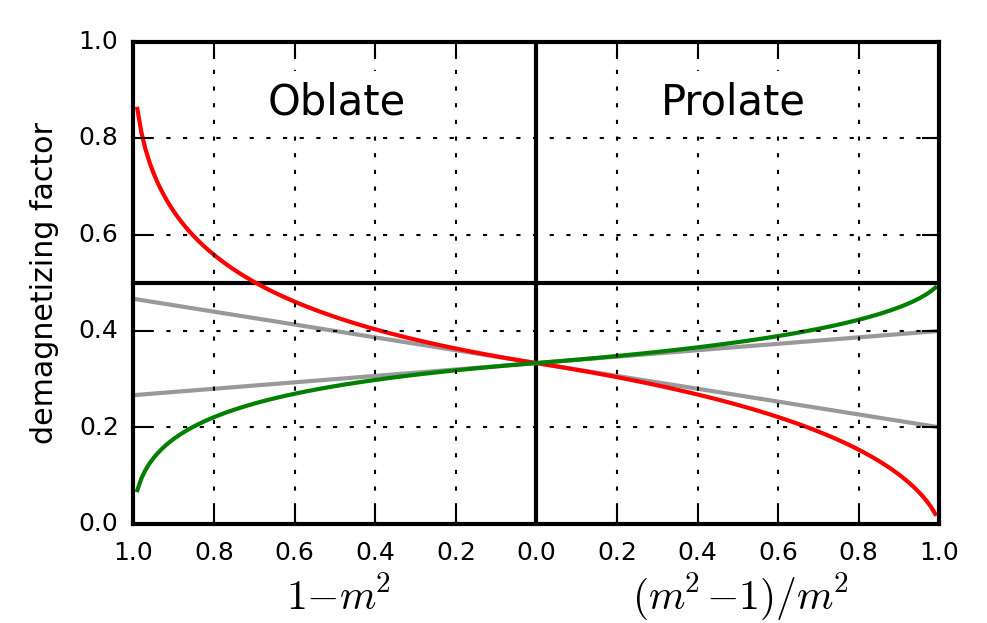

In [14]:
lenght = 3.27
plt.close('all')
plt.figure(figsize=(lenght, 0.6*lenght))

label_fontsize = 10
label_tex_fontsize = 10

plt.plot([0, 0], [0, 1], 'k-')
plt.plot([-1, 1], [0.5, 0.5], 'k-')
plt.plot([-1, 1], [1/3 + 2/15, 1/3 - 2/15], color=(0.6, 0.6, 0.6))
plt.plot([-1, 1], [1/3 - 1/15, 1/3 + 1/15], color=(0.6, 0.6, 0.6))
plt.plot(-e2, n11_oblate, color='r')
plt.plot(-e2, n22_oblate, color='g')
plt.plot(e2, n11_prolate, color='r')
plt.plot(e2, n22_prolate, color='g')
plt.ylabel('demagnetizing factor')
#plt.xlabel('$\epsilon^{2}$', fontsize=label_tex_fontsize)
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.xticks(x, xlables)
plt.yticks(np.linspace(0, 1, 6))

plt.annotate(s='Oblate', xy=(0.17,0.85), 
              xycoords = 'axes fraction', color='k',
              fontsize=label_fontsize, backgroundcolor='w')
plt.annotate(s='Prolate', xy=(0.66,0.85), 
              xycoords = 'axes fraction', color='k',
              fontsize=label_fontsize, backgroundcolor='w')

plt.annotate(s='$1 - m^{2}$', xy=(0.29,0.02), color='k',
             xycoords='figure fraction', fontsize=label_fontsize)
plt.annotate(s='$(m^{2} - 1)/m^{2}$', xy=(0.64,0.02), color='k',
             xycoords='figure fraction', fontsize=label_fontsize)

plt.grid()

plt.tight_layout()

plt.show()

Demagnetizing factors $\tilde{n}^{\dagger}_{11}$ (in red) and $\tilde{n}^{\dagger}_{22}$ (in green) for prolate (Eqs. 34 and 35) and oblate (Eqs. 36 and 37) ellipsoids as functions of eccentricity $\epsilon$. For prolate ellipsoids, $\epsilon^{2} = (m^{2} - 1)/m^{2}$, and for oblate ellipsoids, $\epsilon^{2} = 1 - m^{2}$, where $m = a/b$. The straight lines of slopes $-2/15$ and $+1/15$ (in grey) are tangential to the curves at $\epsilon^{2} = 0$.

## Stoner (1945, Table I)

#### Data presented by Stoner (1945, Table I)

In [15]:
m, Da = np.loadtxt('Stoner1945_TableI.txt', unpack=True)

#### Prolate ellipsoids

In [20]:
# semi-axes (in m)
b0 = 100
a = b0*m[m > 1]

# demagnetizing factors
n11_prolate = []
n22_prolate = []

for ai in a:
    ellipsoid = mesher.ProlateEllipsoid(0, 0, 0, ai, b0, 0, 0, 180)
    N1, N2 = prolate_ellipsoid.demag_factors(ellipsoid)
    n11_prolate.append(N1)
    n22_prolate.append(N2)

#### Oblate ellipsoids

In [21]:
# semi-axes (in m)
b0 = 100
a = b0*m[m < 1]

# demagnetizing factors
n11_oblate = []
n22_oblate = []

for ai in a:
    ellipsoid = mesher.OblateEllipsoid(0, 0, 0, ai, b0, 0, 0, 180)
    N1, N2 = oblate_ellipsoid.demag_factors(ellipsoid)
    n11_oblate.append(N1)
    n22_oblate.append(N2)

#### Plot the results

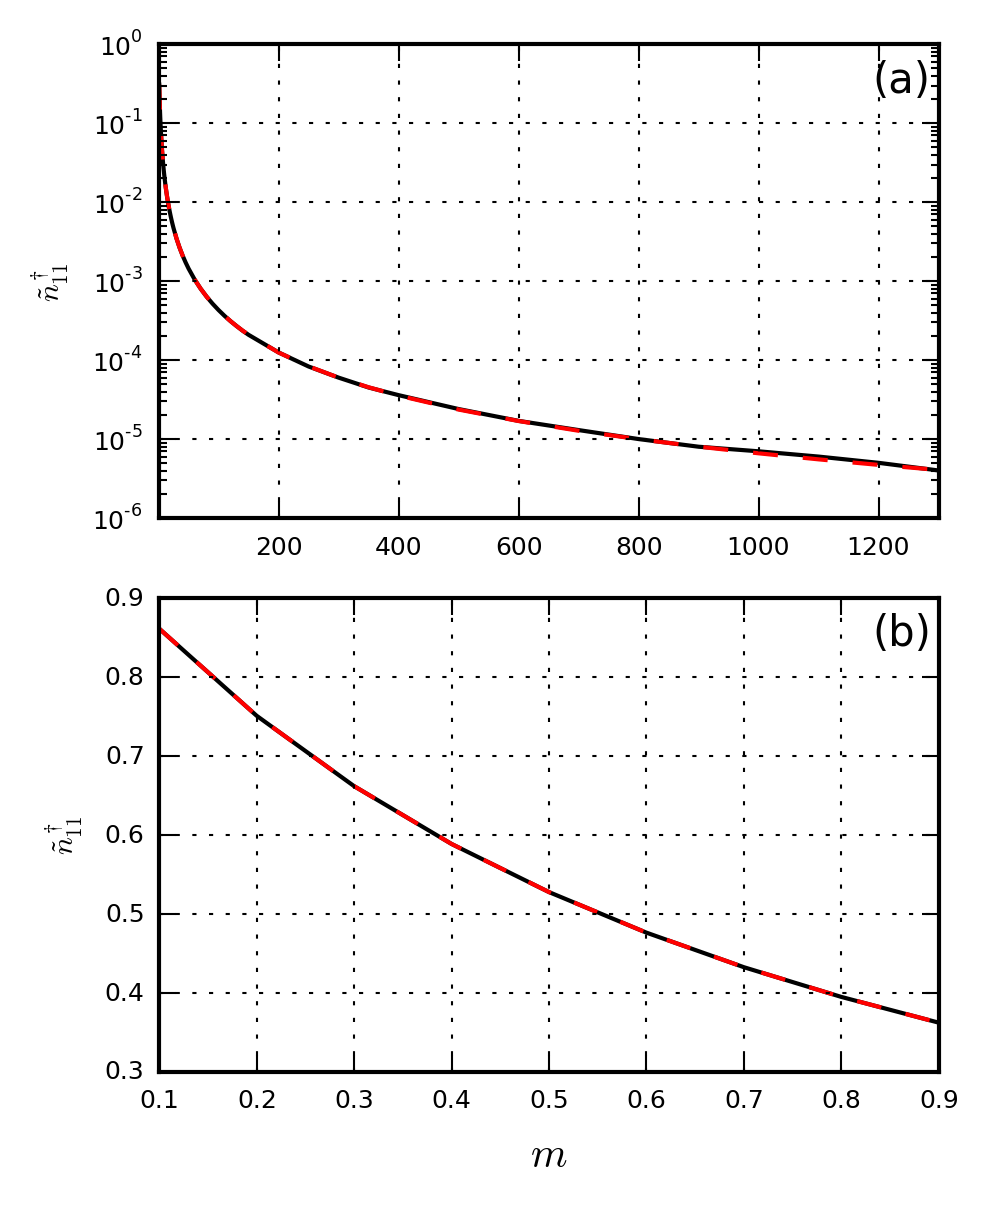

In [37]:
lenght = 3.27
plt.close('all')
plt.figure(figsize=(lenght, 4))

label_fontsize = 10
label_tex_fontsize = 10

plt.subplot(2, 1, 1)
plt.semilogy(m[m > 1], Da[m > 1], 'k-')
plt.semilogy(m[m > 1], n11_prolate, 'r--')
plt.ylabel('$\\tilde{n}^{\dagger}_{11}$')
#plt.xlabel('$m$', fontsize=label_tex_fontsize)
plt.xlim(m[m > 1].min(), m[m > 1].max())
plt.grid()
plt.annotate(s='(a)', xy=(0.92,0.90), 
              xycoords = 'axes fraction', color='k',
              fontsize=label_fontsize)

plt.subplot(2, 1, 2)
plt.plot(m[m < 1], Da[m < 1], 'k-')
plt.plot(m[m < 1], n11_oblate, 'r--')
plt.ylabel('$\\tilde{n}^{\dagger}_{11}$')
plt.xlabel('$m$', fontsize=label_tex_fontsize)
plt.xlim(m[m < 1].min(), m[m < 1].max())
plt.grid()
plt.annotate(s='(b)', xy=(0.92,0.90), 
              xycoords = 'axes fraction', color='k',
              fontsize=label_fontsize)

plt.tight_layout()

plt.show()

Comparison between the demagnetizing factor $\tilde{n}^{\dagger}_{11}$ calculated here (dashed red lines) by using our routines and those presented by Stoner (1945, Table I) (continuous black lines). (a) Result for prolate ellipsoids (calculated by using 34). (b) Result for oblate ellipsoids (calculated by using 36). 